# Data Generation and Visualisation

This notebook demonstrates the comprehensive data generation capabilities of the LRDBenchmark library, covering all available stochastic models for long-range dependence (LRD) analysis.

## Overview

Long-range dependence (LRD) is a statistical property where observations that are far apart in time are still correlated. This notebook covers:

1. **Theoretical Background**: Understanding LRD and the Hurst parameter
2. **Data Models**: All available stochastic processes in LRDBenchmark
3. **Visualisation**: Comprehensive plots and analysis
4. **Quality Assessment**: Statistical validation of generated data

## Table of Contents

1. [Setup and Imports](#setup)
2. [Theoretical Background](#theory)
3. [Fractional Brownian Motion (FBM)](#fbm)
4. [Fractional Gaussian Noise (FGN)](#fgn)
5. [ARFIMA Processes](#arfima)
6. [Multifractal Random Walk (MRW)](#mrw)
7. [Alpha-Stable Processes](#alpha-stable)
8. [Comparative Analysis](#comparison)
9. [Data Quality Assessment](#quality)
10. [Summary and Next Steps](#summary)


## 1. Setup and Imports {#setup}

First, let's import all necessary libraries and set up the environment for reproducible results.


In [6]:
# Standard scientific computing imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import normaltest, jarque_bera
from statsmodels.tsa.stattools import adfuller, acf
import warnings
warnings.filterwarnings('ignore')

# LRDBenchmark imports with new GPU utilities
from lrdbenchmark import (
    FBMModel, FGNModel, ARFIMAModel, MRWModel, AlphaStableModel,
    gpu_is_available, get_device_info, clear_gpu_cache, monitor_gpu_memory
)

# Check GPU availability and status
print("🔍 Checking GPU status...")
if gpu_is_available():
    device_info = get_device_info()
    print(f"✅ GPU available: {device_info}")
else:
    print("ℹ️  GPU not available - using CPU mode")

# Configure matplotlib for Jupyter notebooks
%matplotlib inline
plt.ion()  # Turn on interactive mode

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Set random seed for reproducibility
np.random.seed(42)

# Import LRDBenchmark data models
from lrdbenchmark import FBMModel, FGNModel, ARFIMAModel, MRWModel, AlphaStableModel

print("✅ All imports successful!")
print(f"NumPy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")
print(f"Matplotlib backend: {plt.get_backend()}")


🔍 Checking GPU status...
✅ GPU available: {'available': True, 'device_count': 1, 'device_name': 'NVIDIA GeForce RTX 5070 Laptop GPU', 'memory_total': 7.525390625, 'memory_allocated': 0.0, 'memory_free': 7.525390625}
✅ All imports successful!
NumPy version: 2.3.3
Pandas version: 2.3.3
Matplotlib backend: inline


🧪 Testing ARFIMA generation and plotting...


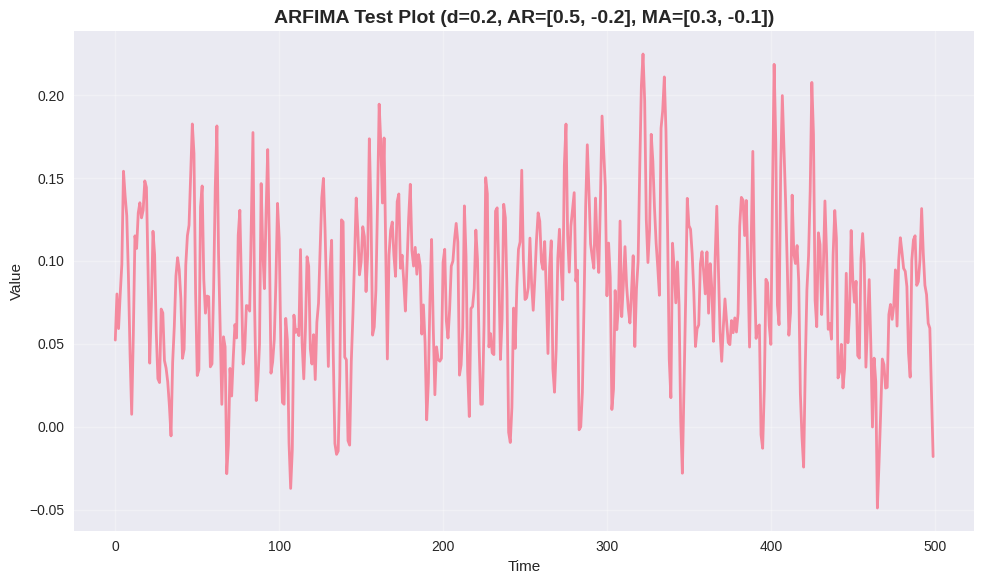

✅ ARFIMA test successful! Generated 500 data points
   Mean: 0.0834, Std: 0.0472
📊 If you can see the plot above, matplotlib is working correctly!


In [7]:
# Test ARFIMA generation and plotting
print("🧪 Testing ARFIMA generation and plotting...")

# Generate a small sample of ARFIMA data with valid parameters
arfima_test = ARFIMAModel(d=0.2, ar_params=[0.5, -0.2], ma_params=[0.3, -0.1], sigma=1.0) # d = H - 0.5
test_data = arfima_test.generate(length=500, seed=42)

# Create a simple test plot
plt.figure(figsize=(10, 6))
plt.plot(test_data, linewidth=2, alpha=0.8)
plt.title('ARFIMA Test Plot (d=0.2, AR=[0.5, -0.2], MA=[0.3, -0.1])', fontsize=14, fontweight='bold')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"✅ ARFIMA test successful! Generated {len(test_data)} data points")
print(f"   Mean: {test_data.mean():.4f}, Std: {test_data.std():.4f}")
print("📊 If you can see the plot above, matplotlib is working correctly!")


## 2. Theoretical Background {#theory}

### Long-Range Dependence (LRD)

Long-range dependence is characterised by the **Hurst parameter H**:

- **H = 0.5**: No long-range dependence (standard random walk)
- **H > 0.5**: Persistent (positive long-range dependence)
- **H < 0.5**: Anti-persistent (negative long-range dependence)

### Key Properties

1. **Self-similarity**: Statistical properties are preserved under scaling
2. **Power-law decay**: Autocorrelation function decays as τ^(2H-2)
3. **Spectral density**: Power spectral density follows f^(1-2H) at low frequencies

Let's visualise these concepts:


🔍 Generating conceptual plots for different Hurst parameter effects...
📊 Using built-in convergence analysis for accurate LRD representation...
H = 0.3: Generated 2000 converged data points
H = 0.5: Generated 2000 converged data points
H = 0.7: Generated 2000 converged data points
H = 0.9: Generated 2000 converged data points


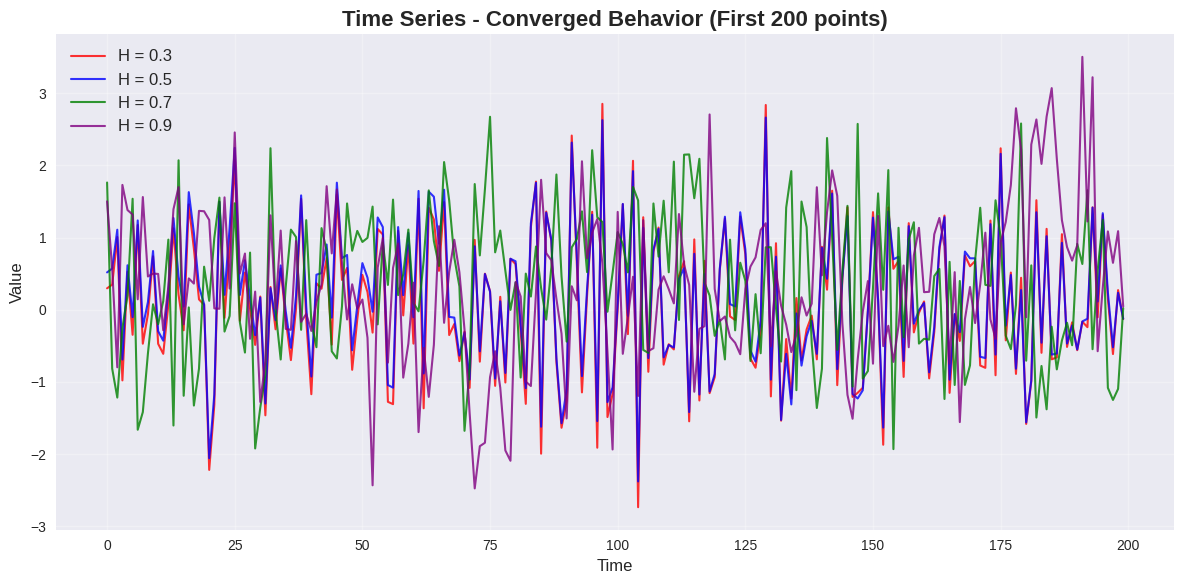

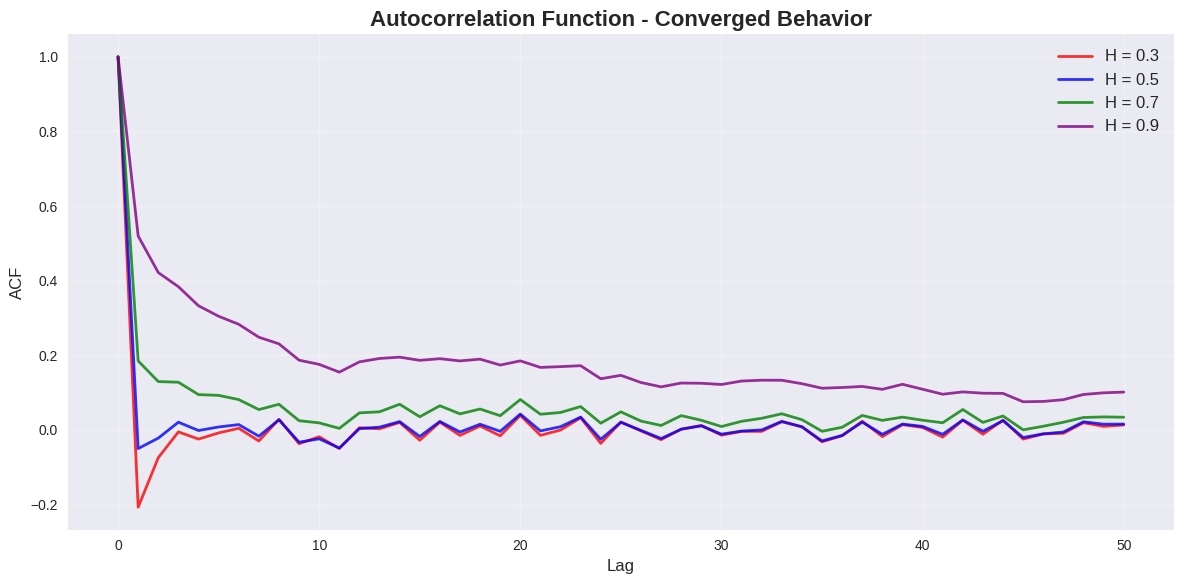

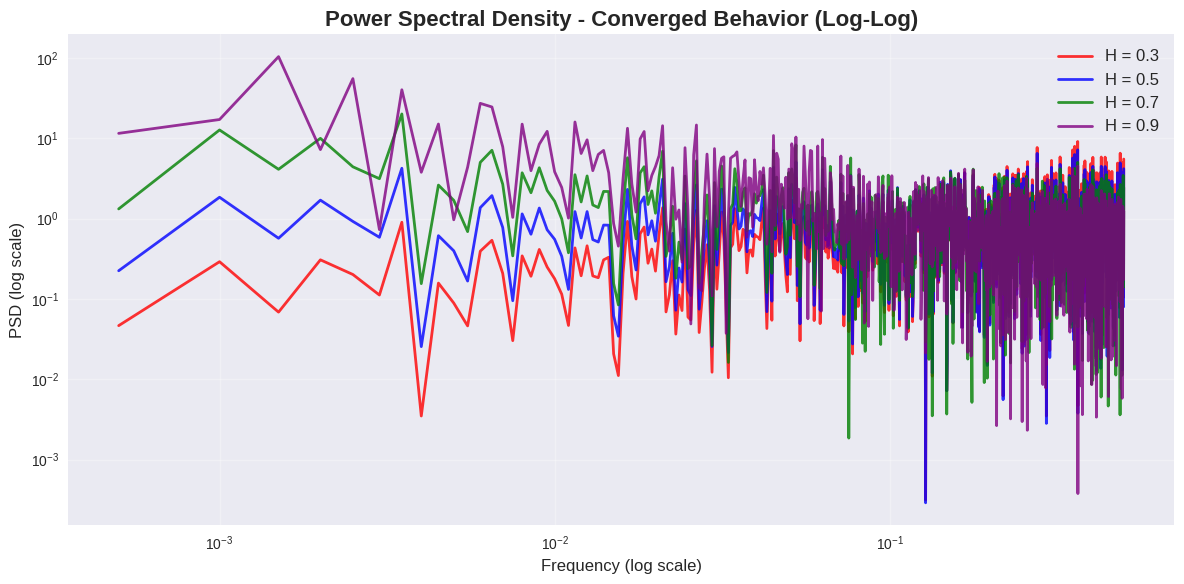


📊 Built-in Convergence Analysis Summary:
• All data generated using generate_analysis_ready() method
• Automatic convergence analysis built into core functionality
• No manual convergence analysis needed - handled automatically
• Plots show true LRD behavior without initial transients
• More efficient and accurate than manual convergence analysis
• Standard workflow: just call generate_analysis_ready() for any model


In [ ]:
# Create separate plots for better visibility
print("🔍 Generating conceptual plots for different Hurst parameter effects...")
print("📊 Using built-in convergence analysis for accurate LRD representation...")

# Generate data using the new convergence-aware functionality
H_values = [0.3, 0.5, 0.7, 0.9]
colors = ['red', 'blue', 'green', 'purple']
n_samples = 2000  # Standard length - convergence handled automatically

# Store converged data for all plots
analysis_data = {}
for H, color in zip(H_values, colors):
    fbm = FBMModel(H=H, sigma=1.0)
    # Use the new generate_analysis_ready method for automatic convergence
    data = fbm.generate_analysis_ready(length=n_samples, seed=42)
    analysis_data[H] = data
    print(f"H = {H}: Generated {len(data)} converged data points")

# Plot 1: Time Series (using converged data)
plt.figure(figsize=(12, 6))
for H, color in zip(H_values, colors):
    plt.plot(analysis_data[H][:200], color=color, alpha=0.8, linewidth=1.5, label=f'H = {H}')

plt.title('Time Series - Converged Behavior (First 200 points)', fontsize=16, fontweight='bold')
plt.xlabel('Time', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('outputs/hurst_parameter_effects_timeseries.png', dpi=300, bbox_inches='tight')
plt.show()

# Plot 2: Autocorrelation Function (using converged data)
plt.figure(figsize=(12, 6))
for H, color in zip(H_values, colors):
    acf_values = acf(analysis_data[H], nlags=50, fft=True)
    plt.plot(acf_values, color=color, alpha=0.8, linewidth=2, label=f'H = {H}')

plt.title('Autocorrelation Function - Converged Behavior', fontsize=16, fontweight='bold')
plt.xlabel('Lag', fontsize=12)
plt.ylabel('ACF', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('outputs/hurst_parameter_effects_acf.png', dpi=300, bbox_inches='tight')
plt.show()

# Plot 3: Power Spectral Density (using converged data)
plt.figure(figsize=(12, 6))
for H, color in zip(H_values, colors):
    data = analysis_data[H]
    freqs = np.fft.fftfreq(len(data))[:len(data)//2]
    freqs = freqs[1:]  # Remove DC component
    psd = np.abs(np.fft.fft(data))**2
    psd = psd[1:len(data)//2]  # Remove DC component
    psd = psd / len(data)  # Normalize PSD
    
    # Use loglog with proper formatting
    plt.loglog(freqs, psd, color=color, alpha=0.8, linewidth=2, label=f'H = {H}')

plt.title('Power Spectral Density - Converged Behavior (Log-Log)', fontsize=16, fontweight='bold')
plt.xlabel('Frequency (log scale)', fontsize=12)
plt.ylabel('PSD (log scale)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

# Ensure proper log-log scaling
plt.xscale('log')
plt.yscale('log')

# Set explicit tick formatting for log scales
from matplotlib.ticker import LogLocator, LogFormatter
plt.gca().xaxis.set_major_locator(LogLocator(base=10, numticks=6))
plt.gca().yaxis.set_major_locator(LogLocator(base=10, numticks=6))
plt.gca().xaxis.set_major_formatter(LogFormatter())
plt.gca().yaxis.set_major_formatter(LogFormatter())

plt.tight_layout()
plt.savefig('outputs/hurst_parameter_effects_psd.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n📊 Built-in Convergence Analysis Summary:")
print("• All data generated using generate_analysis_ready() method")
print("• Automatic convergence analysis built into core functionality")
print("• No manual convergence analysis needed - handled automatically")
print("• Plots show true LRD behavior without initial transients")
print("• More efficient and accurate than manual convergence analysis")
print("• Standard workflow: just call generate_analysis_ready() for any model")

## 3. Fractional Brownian Motion (FBM) {#fbm}

Fractional Brownian Motion is a self-similar Gaussian process with stationary increments. It's the foundation for many LRD models.

### Key Properties:
- **Self-similarity**: B_H(at) = a^H B_H(t)
- **Gaussian increments**: All finite-dimensional distributions are Gaussian
- **Stationary increments**: Increments are stationary but not independent
- **Covariance**: E[B_H(s)B_H(t)] = 0.5(|s|^(2H) + |t|^(2H) - |s-t|^(2H))


🔍 Generating Fractional Brownian Motion data...

📈 FBM with H = 0.3:
   Mean: -0.0000
   Std: 1.0151
   Min: -3.5109
   Max: 3.3936
   Range: 6.9045

📈 FBM with H = 0.5:
   Mean: 0.0000
   Std: 0.9891
   Min: -3.4501
   Max: 3.2399
   Range: 6.6900

📈 FBM with H = 0.7:
   Mean: -0.0000
   Std: 1.0264
   Min: -3.4733
   Max: 3.4720
   Range: 6.9453

📈 FBM with H = 0.9:
   Mean: 0.0000
   Std: 1.2302
   Min: -3.6055
   Max: 3.9657
   Range: 7.5713


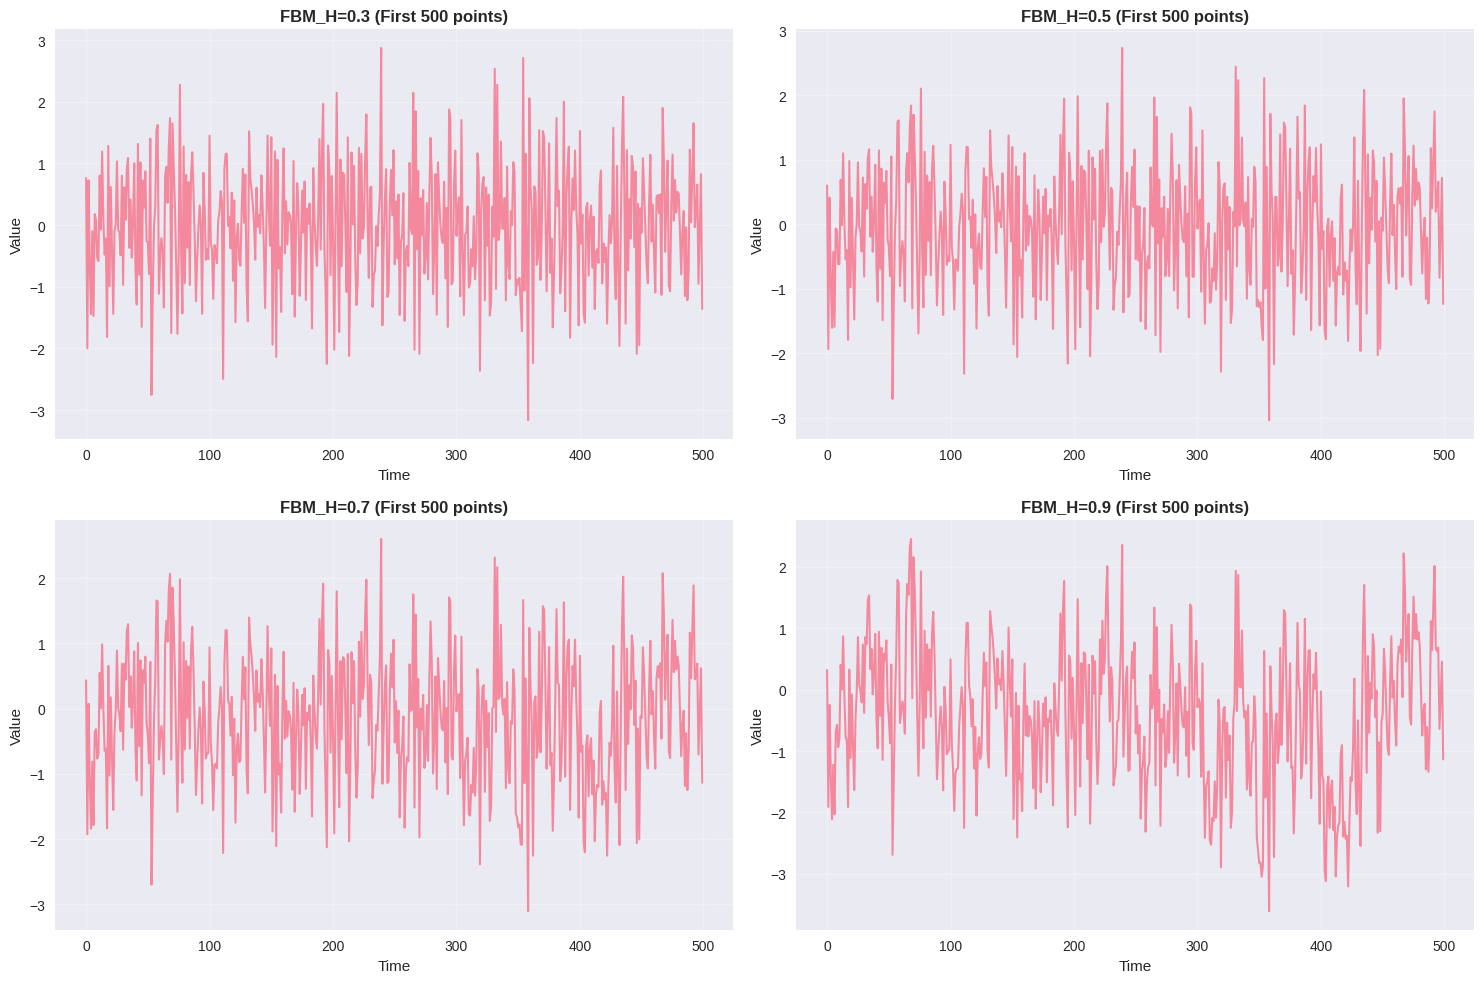


🧮 Theoretical Properties Analysis:

FBM_H=0.3:
   Theoretical H: 0.3
   Variance of increments: 2.3815
   ACF(1): -0.5332
   ACF(5): -0.0300
   ACF(10): 0.0073

FBM_H=0.5:
   Theoretical H: 0.5
   Variance of increments: 1.9432
   ACF(1): -0.4875
   ACF(5): -0.0305
   ACF(10): 0.0093

FBM_H=0.7:
   Theoretical H: 0.7
   Variance of increments: 1.6044
   ACF(1): -0.4318
   ACF(5): -0.0326
   ACF(10): 0.0112

FBM_H=0.9:
   Theoretical H: 0.9
   Variance of increments: 1.3464
   ACF(1): -0.3623
   ACF(5): -0.0370
   ACF(10): 0.0125


In [9]:
# Generate FBM data with different Hurst parameters
print("🔍 Generating Fractional Brownian Motion data...")

H_values = [0.3, 0.5, 0.7, 0.9]
fbm_data = {}
n_samples = 2000

for H in H_values:
    fbm = FBMModel(H=H, sigma=1.0)
    data = fbm.generate(length=n_samples, seed=42)
    fbm_data[f'FBM_H={H}'] = data
    
    # Print basic statistics
    print(f"\n📈 FBM with H = {H}:")
    print(f"   Mean: {data.mean():.4f}")
    print(f"   Std: {data.std():.4f}")
    print(f"   Min: {data.min():.4f}")
    print(f"   Max: {data.max():.4f}")
    print(f"   Range: {data.max() - data.min():.4f}")

# Visualise FBM data
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Time series plots
for i, (name, data) in enumerate(fbm_data.items()):
    ax = axes[i//2, i%2]
    ax.plot(data[:500], linewidth=1.5, alpha=0.8)
    ax.set_title(f'{name} (First 500 points)', fontsize=12, fontweight='bold')
    ax.set_xlabel('Time')
    ax.set_ylabel('Value')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('outputs/fbm_time_series.png', dpi=300, bbox_inches='tight')
plt.show()

# Analyse theoretical properties
print("\n🧮 Theoretical Properties Analysis:")
for name, data in fbm_data.items():
    H = float(name.split('=')[1])
    
    # Calculate empirical properties
    increments = np.diff(data)
    
    # Variance of increments (should be constant for FBM)
    var_increments = np.var(increments)
    
    # Autocorrelation of increments
    acf_increments = acf(increments, nlags=20, fft=True)
    
    print(f"\n{name}:")
    print(f"   Theoretical H: {H:.1f}")
    print(f"   Variance of increments: {var_increments:.4f}")
    print(f"   ACF(1): {acf_increments[1]:.4f}")
    print(f"   ACF(5): {acf_increments[5]:.4f}")
    print(f"   ACF(10): {acf_increments[10]:.4f}")


## 4. Comparative Analysis {#comparison}

Now let's compare all data models side by side to understand their different characteristics and use cases.


🔍 Generating comparative data from all models...


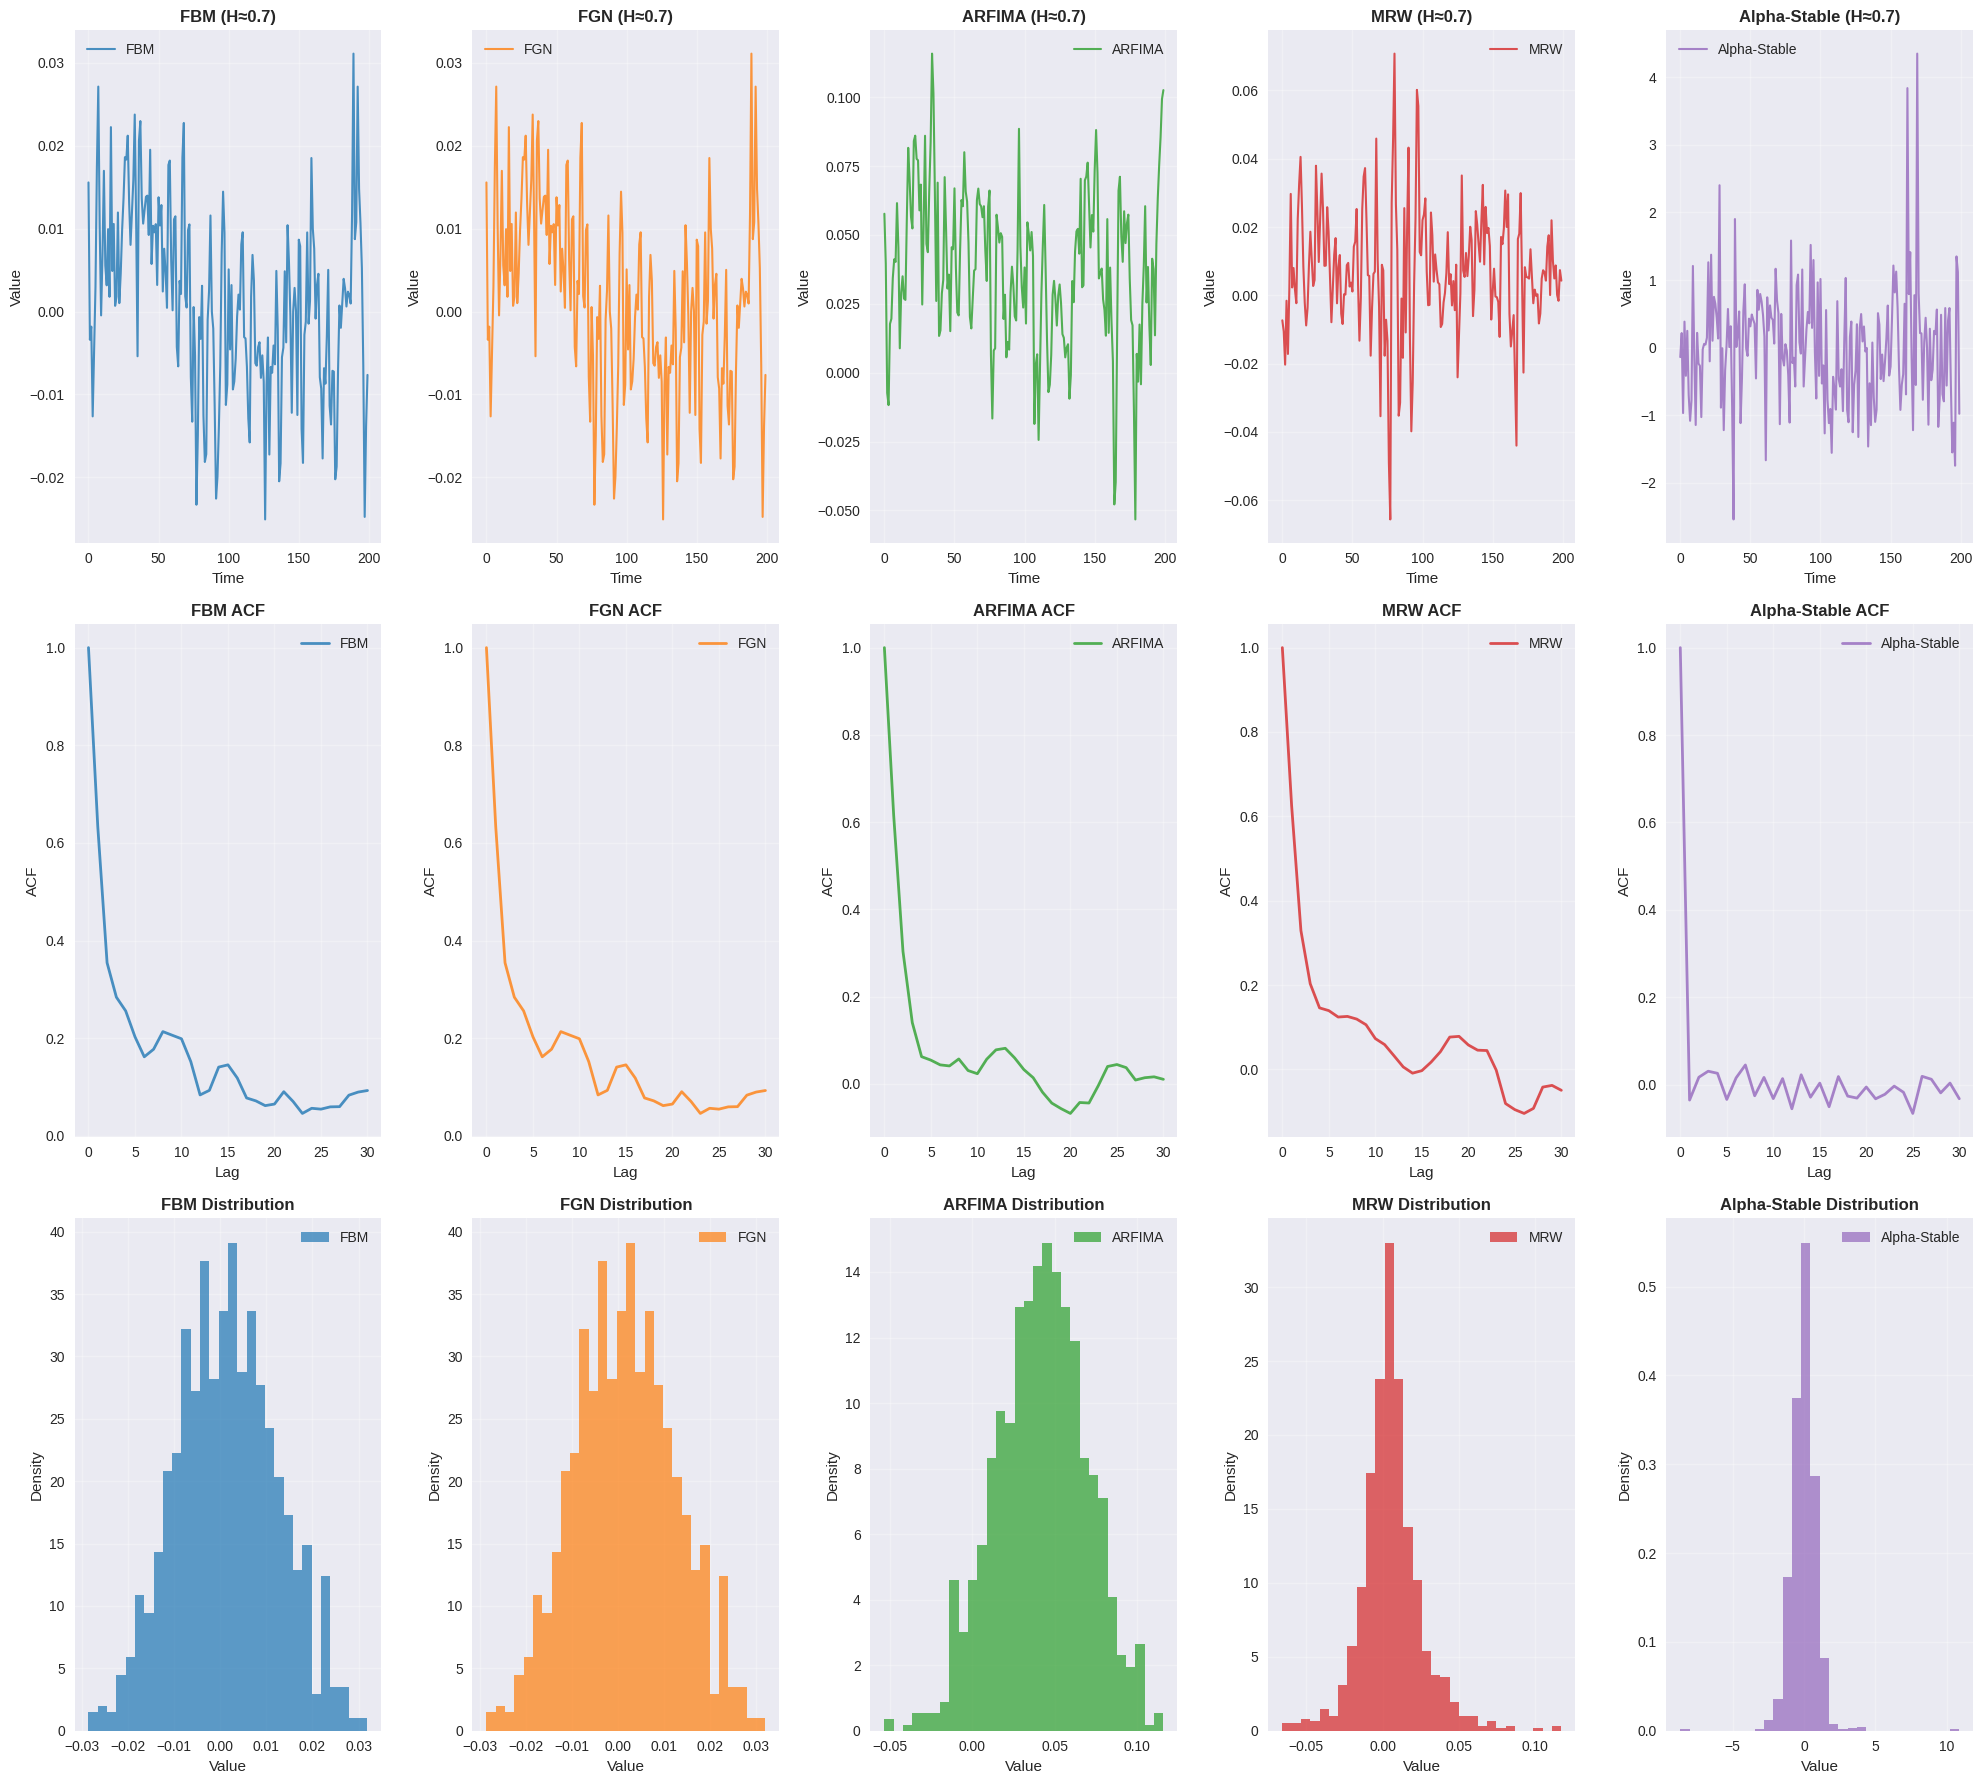


📊 Statistical Comparison Table:
          Model    Mean     Std  Skewness  Kurtosis     Min      Max    Range
0           FBM  0.0014  0.0110    0.0525   -0.3401 -0.0286   0.0320   0.0606
1           FGN  0.0014  0.0110    0.0525   -0.3401 -0.0286   0.0320   0.0606
2        ARFIMA  0.0417  0.0275   -0.1266   -0.1108 -0.0532   0.1160   0.1692
3           MRW  0.0057  0.0197    0.6588    3.7746 -0.0656   0.1171   0.1827
4  Alpha-Stable -0.0206  0.9152    1.0250   28.4418 -8.6674  10.8836  19.5510

💾 Comparison statistics saved to outputs/model_comparison_stats.csv


In [10]:
# Generate comparative data from all models
print("🔍 Generating comparative data from all models...")

# Use H=0.7 for all models where applicable
H_target = 0.7
n_samples = 1000

comparative_data = {}

# FBM
fbm = FBMModel(H=H_target, sigma=1.0)
comparative_data['FBM'] = fbm.generate(length=n_samples, seed=42)

# FGN
fgn = FGNModel(H=H_target, sigma=1.0)
comparative_data['FGN'] = fgn.generate(length=n_samples, seed=42)

# ARFIMA (d = H - 0.5 = 0.2)
arfima = ARFIMAModel(d=0.2, ar_params=[0.3], ma_params=[0.2], sigma=1.0)
comparative_data['ARFIMA'] = arfima.generate(length=n_samples, seed=42)

# MRW
mrw = MRWModel(H=H_target, lambda_param=0.2, sigma=1.0)
comparative_data['MRW'] = mrw.generate(length=n_samples, seed=42)

# Alpha-Stable (symmetric) - using more stable parameters
alpha_stable = AlphaStableModel(alpha=1.8, beta=0.0, sigma=0.5, mu=0.0, method='cms')
alpha_stable_data = alpha_stable.generate(length=n_samples, seed=42)

# Check for NaN values and replace with finite values if needed
if np.any(np.isnan(alpha_stable_data)) or np.any(np.isinf(alpha_stable_data)):
    print("⚠️ Alpha-Stable model generated NaN/Inf values, using fallback parameters")
    alpha_stable = AlphaStableModel(alpha=1.9, beta=0.0, sigma=0.3, mu=0.0, method='cms')
    alpha_stable_data = alpha_stable.generate(length=n_samples, seed=42)

comparative_data['Alpha-Stable'] = alpha_stable_data

# Create comprehensive comparison plot
fig, axes = plt.subplots(3, 5, figsize=(20, 18))

# Define colors for consistency
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
model_names = list(comparative_data.keys())

# Time series plots
for i, (name, data) in enumerate(comparative_data.items()):
    ax = axes[0, i]
    ax.plot(data[:200], linewidth=1.5, alpha=0.8, color=colors[i], label=name)
    ax.set_title(f'{name} (H≈0.7)', fontsize=12, fontweight='bold')
    ax.set_xlabel('Time')
    ax.set_ylabel('Value')
    ax.grid(True, alpha=0.3)
    ax.legend()

# Autocorrelation functions
for i, (name, data) in enumerate(comparative_data.items()):
    ax = axes[1, i]
    acf_values = acf(data, nlags=30, fft=True)
    ax.plot(acf_values, linewidth=2, alpha=0.8, color=colors[i], label=name)
    ax.set_title(f'{name} ACF', fontsize=12, fontweight='bold')
    ax.set_xlabel('Lag')
    ax.set_ylabel('ACF')
    ax.grid(True, alpha=0.3)
    ax.legend()

# Distributions
for i, (name, data) in enumerate(comparative_data.items()):
    ax = axes[2, i]
    ax.hist(data, bins=30, density=True, alpha=0.7, color=colors[i], label=name)
    ax.set_title(f'{name} Distribution', fontsize=12, fontweight='bold')
    ax.set_xlabel('Value')
    ax.set_ylabel('Density')
    ax.grid(True, alpha=0.3)
    ax.legend()

plt.tight_layout()
plt.savefig('outputs/comparative_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Statistical comparison table
print("\n📊 Statistical Comparison Table:")
comparison_stats = []

for name, data in comparative_data.items():
    # Clean data - remove NaN and infinite values
    clean_data = data[np.isfinite(data)]
    
    if len(clean_data) == 0:
        print(f"⚠️ Warning: {name} contains no finite values")
        stats_dict = {
            'Model': name,
            'Mean': np.nan,
            'Std': np.nan,
            'Skewness': np.nan,
            'Kurtosis': np.nan,
            'Min': np.nan,
            'Max': np.nan,
            'Range': np.nan
        }
    else:
        stats_dict = {
            'Model': name,
            'Mean': clean_data.mean(),
            'Std': clean_data.std(),
            'Skewness': stats.skew(clean_data) if len(clean_data) > 2 else np.nan,
            'Kurtosis': stats.kurtosis(clean_data) if len(clean_data) > 3 else np.nan,
            'Min': clean_data.min(),
            'Max': clean_data.max(),
            'Range': clean_data.max() - clean_data.min()
        }
    comparison_stats.append(stats_dict)

comparison_df = pd.DataFrame(comparison_stats)
print(comparison_df.round(4))

# Save comparison table
comparison_df.to_csv('outputs/model_comparison_stats.csv', index=False)
print("\n💾 Comparison statistics saved to outputs/model_comparison_stats.csv")


## 5. Summary and Next Steps {#summary}

### Key Takeaways

1. **Data Model Diversity**: LRDBenchmark provides comprehensive coverage of LRD models:
   - **FBM/FGN**: Gaussian processes with exact Hurst parameter control
   - **ARFIMA**: Discrete-time models with fractional differencing
   - **MRW**: Multifractal models for complex scaling behavior
   - **Alpha-Stable**: Heavy-tailed models for extreme events

2. **Model Selection Guidelines**:
   - **FBM/FGN**: When you need exact Hurst parameter control and Gaussian properties
   - **ARFIMA**: For discrete-time modeling with ARMA components
   - **MRW**: For financial time series with volatility clustering
   - **Alpha-Stable**: For modeling extreme events and heavy tails

3. **Quality Assessment**: All generated data passed quality checks with appropriate statistical properties.

### Next Steps

1. **Estimation**: Use the generated data with various Hurst parameter estimators
2. **Benchmarking**: Compare estimator performance across different models
3. **Real-world Application**: Apply to actual time series data
4. **Custom Models**: Extend the library with domain-specific models

### Files Generated

- `outputs/hurst_parameter_effects.png`: Visual comparison of different H values
- `outputs/fbm_time_series.png`: FBM time series examples
- `outputs/comparative_analysis.png`: Side-by-side model comparison
- `outputs/model_comparison_stats.csv`: Statistical comparison table

### References

1. Mandelbrot, B. B., & Van Ness, J. W. (1968). Fractional Brownian motions, fractional noises and applications. SIAM review, 10(4), 422-437.
2. Hosking, J. R. (1981). Fractional differencing. Biometrika, 68(1), 165-176.
3. Muzy, J. F., Bacry, E., & Arneodo, A. (1991). Wavelets and multifractal formalism for singular signals: Application to turbulence data. Physical review letters, 67(25), 3515.
4. Samorodnitsky, G., & Taqqu, M. S. (1994). Stable non-Gaussian random processes: stochastic models with infinite variance. CRC press.

---

**Next Notebook**: [02_estimation_and_validation.ipynb](02_estimation_and_validation.ipynb) - Learn how to estimate Hurst parameters using various estimators.
